In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect
from sqlalchemy.sql import operators, extract

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables

Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
inspector = inspect(engine)
inspector.get_table_names()
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [8]:
# Save references to each table
measurement_reflected = Base.classes.measurement
station_reflected = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session (engine)

#session.query (
#    measurement_reflected.station, 
#    measurement_reflected.date, 
#    measurement_reflected.prcp,
#    measurement_reflected.tobs
#).all()
results = (
    session
    .query(
        measurement_reflected.station, 
        measurement_reflected.date, 
        measurement_reflected.prcp,
        measurement_reflected.tobs
    )
    #.filter (Players_reflected.birth_country=='USA')
    #.filter (Players_reflected.birth_year<1940)
    #.limit (10)
    .all()
)

results = pd.DataFrame(results)

results['date'] = pd.to_datetime(results['date'])
results
#print(type(results.date[1]))

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0
19546,USC00516128,2017-08-20,NaN,78.0
19547,USC00516128,2017-08-21,0.56,76.0
19548,USC00516128,2017-08-22,0.50,76.0


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = results['date'].max()
recent_date

Timestamp('2017-08-23 00:00:00')

In [11]:
results = (
    session
    .query(
        #measurement_reflected.date,func.count(measurement_reflected.date)).group_by(measurement_reflected.date).all()
        #measurement_reflected.station, 
        measurement_reflected.date, 
        measurement_reflected.prcp
        #measurement_reflected.tobs
        #session.query(Table.column, 
    )

    #.filter (measurement_reflected.birth_country=='USA')
    #.filter (measurement_reflected.birth_year<1940)
    .group_by(measurement_reflected.date)
    .order_by(measurement_reflected.date)
    .limit (10)
    .all()
)
results

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0)]

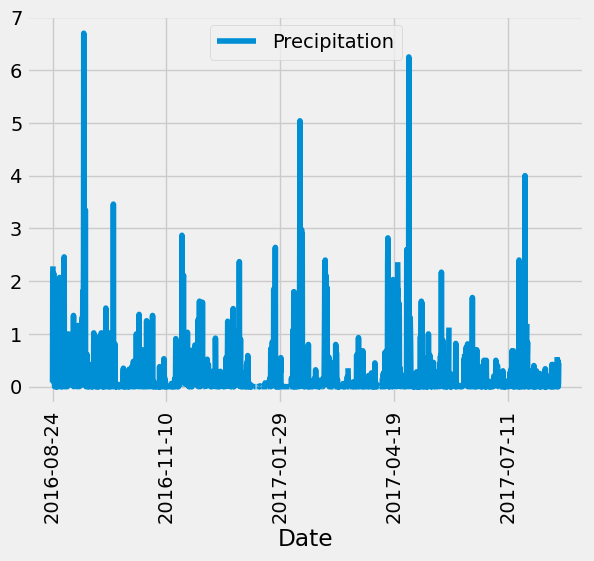

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


query_result = (
    session
    .query(
        measurement_reflected.date, 
        measurement_reflected.prcp
    )
    # Calculate the date one year from the last date in data set.
    # Perform a query to retrieve the data and precipitation scores
    .filter(measurement_reflected.date>'2016-08-23')
    .order_by(measurement_reflected.date)
    .all()
)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
results = pd.DataFrame(query_result)
results.rename(columns={"date": "Date"}, inplace=True)
results.rename(columns={"prcp": "Precipitation"}, inplace=True)
#results['Date']=pd.to_datetime(results['Date'])

# Use Pandas Plotting with Matplotlib to plot the data


(
    results
    .set_index('Date')
    .plot()

)
plt.xticks(rotation=90)
plt.show()


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
results[["Precipitation"]].describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
station_reflected = Base.classes.station

inspector = inspect(engine)
inspector.get_table_names()
inspector.get_columns('station')



[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [16]:
# Design a query to calculate the total number of stations in the dataset

session.query(func.count(station_reflected.station)).all()

[(9,)]

In [58]:
session = Session (engine)

results = (
    session
    .query(
        station_reflected.station,
        #func.count(station_reflected.name),
        func.count(station_reflected.station)
    )
    .group_by(station_reflected.station)
    .order_by(station_reflected.station)
    .all()
)

results


[('USC00511918', 1),
 ('USC00513117', 1),
 ('USC00514830', 1),
 ('USC00516128', 1),
 ('USC00517948', 1),
 ('USC00518838', 1),
 ('USC00519281', 1),
 ('USC00519397', 1),
 ('USC00519523', 1)]

In [62]:
session.query(station_reflected.station, func.count(station_reflected.station)).\
    group_by(station_reflected.station).order_by(func.count(station_reflected.station).desc()).all()

[('USC00519523', 1),
 ('USC00519397', 1),
 ('USC00519281', 1),
 ('USC00518838', 1),
 ('USC00517948', 1),
 ('USC00516128', 1),
 ('USC00514830', 1),
 ('USC00513117', 1),
 ('USC00511918', 1)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

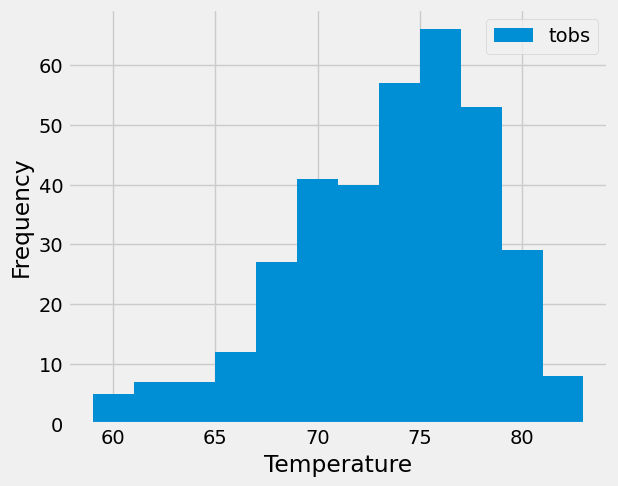

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()